<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-08-03 18:08:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: 'survey-data.csv'

     0K .......... .......... .......... .......... ..........  0%  668K 3m53s
    50K .......... .......... .......... .......... ..........  0% 1.23M 2m58s
   100K .......... .......... .......... .......... ..........  0% 2.24M 2m21s
   150K .......... .......... .......... .......... ..........  0% 2.83M 1m59s
   200K .......... .......... .......... .......... ..........  0% 2.87M 1m46s
   250K .......... .......... .......... ....

#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [7]:
# unique values in 'Age' column

unique_ages = df['Age'].unique()
print("Unique ages in the dataset:", unique_ages)

Unique ages in the dataset: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


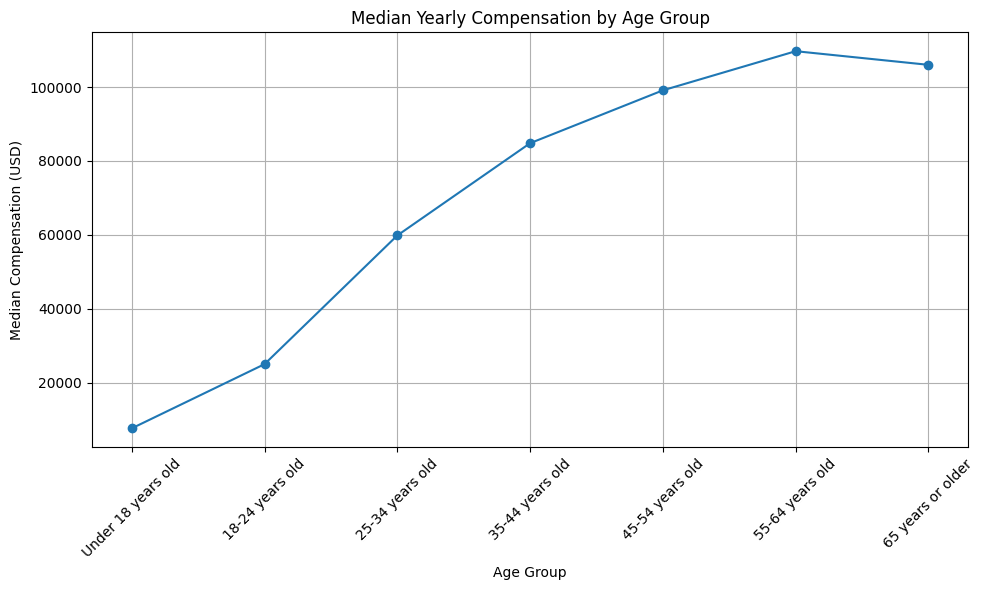

In [8]:
# Filter out rows where Age is 'Prefer not to say' and compensation is missing
df_filtered = df[
    (df['Age'] != 'Prefer not to say') &
    (~df['ConvertedCompYearly'].isna())
]

# Define the correct order for age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Group by Age and calculate median compensation, then sort by age order
median_comp = (
    df_filtered.groupby('Age')['ConvertedCompYearly']
    .median()
    .reindex(age_order)
    .reset_index()
)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp['Age'], median_comp['ConvertedCompYearly'], marker='o', linestyle='-')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.`


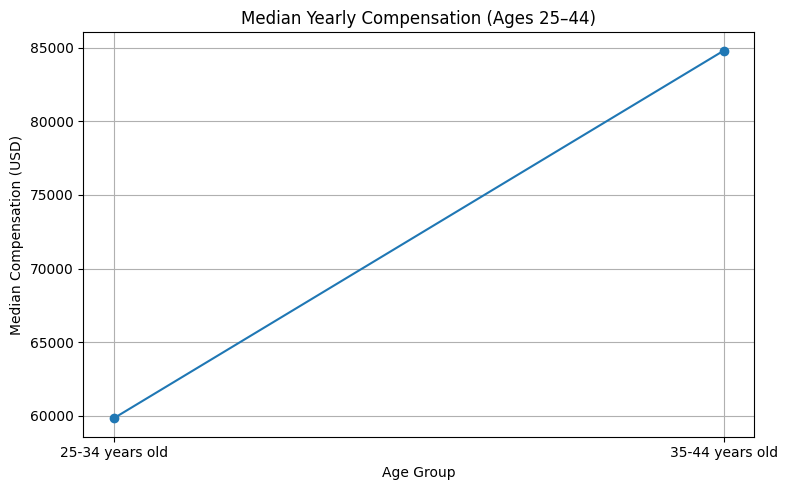

In [9]:
# Filter out 'Prefer not to say' and missing compensation
df_filtered = df[
    (df['Age'].isin(['25-34 years old', '35-44 years old'])) &
    (~df['ConvertedCompYearly'].isna())
]

# Define the order for the age range 25–45
age_focus_order = ['25-34 years old', '35-44 years old']

# Group by Age and compute the median
median_comp_focus = (
    df_filtered.groupby('Age')['ConvertedCompYearly']
    .median()
    .reindex(age_focus_order)
    .reset_index()
)

# Plot the focused line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp_focus['Age'], median_comp_focus['ConvertedCompYearly'], marker='o', linestyle='-')
plt.title('Median Yearly Compensation (Ages 25–44)')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [10]:
# columns with 'experience' in their names

experience_columns = [col for col in df.columns if 'years' in col.lower()]
print("Columns related to experience:", experience_columns)

Columns related to experience: ['YearsCode', 'YearsCodePro']


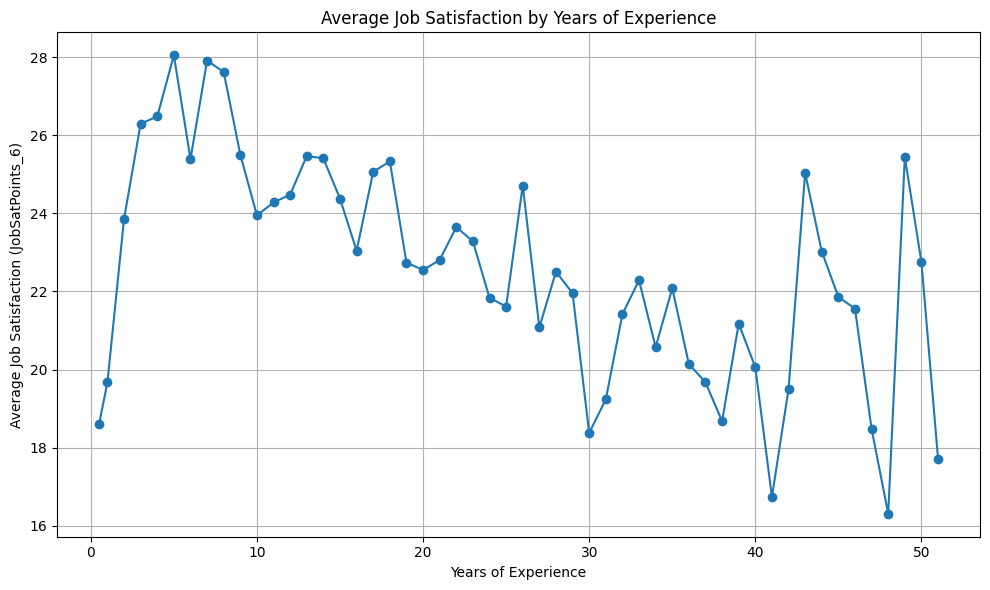

In [11]:
# Step 1: Filter out missing values
df_filtered = df[['YearsCode', 'JobSatPoints_6']].dropna()

# Step 2: Replace text values in YearsCode
df_filtered['YearsCode'] = df_filtered['YearsCode'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Step 3: Convert YearsCode to numeric
df_filtered['YearsCode'] = pd.to_numeric(df_filtered['YearsCode'], errors='coerce')

# Step 4: Group by YearsCode and calculate average job satisfaction
satisfaction_by_exp = (
    df_filtered.groupby('YearsCode')['JobSatPoints_6']
    .mean()
    .reset_index()
)

# Step 5: Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_by_exp['YearsCode'], satisfaction_by_exp['JobSatPoints_6'], marker='o')
plt.title('Average Job Satisfaction by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [12]:
# columns with 'work' in their names

work_columns = [col for col in df.columns if 'work' in col.lower()]
print("Columns related to work:", work_columns)

Columns related to work: ['RemoteWork', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'WorkExp']


In [13]:
# show values in 'workexp'

workexp_values = df['WorkExp'].unique()
print("Unique values in 'WorkExp':", workexp_values)

Unique values in 'WorkExp': [nan 17. 15. 12. 29. 10. 18. 16.  6.  7. 14.  3.  4.  8.  1.  9. 27. 31.
 35. 25.  5. 28. 26. 13. 30. 37.  2. 24. 20. 23. 19. 21. 11. 34. 32. 22.
  0. 33. 44. 40. 41. 36. 45. 39. 50. 38. 48. 42. 46. 43. 49. 47.]


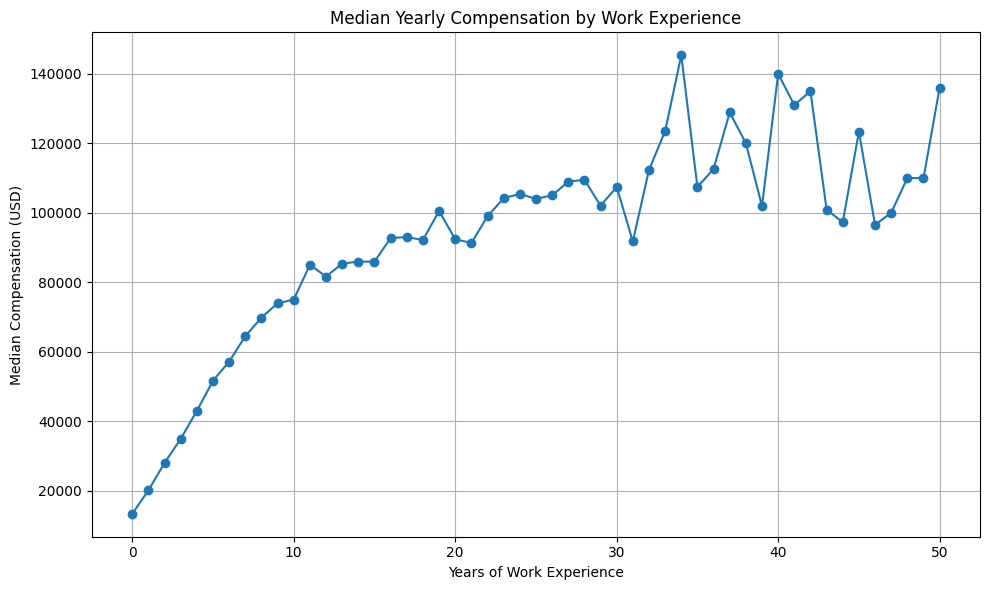

In [14]:
# Step 1: Filter necessary columns and drop missing values
df_filtered = df[['WorkExp', 'ConvertedCompYearly']].dropna()

# Step 2: Clean the WorkExp column (if it contains string values like "Less than 1 year", "More than 50 years")
df_filtered['WorkExp'] = df_filtered['WorkExp'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Step 3: Convert WorkExp to numeric
df_filtered['WorkExp'] = pd.to_numeric(df_filtered['WorkExp'], errors='coerce')

# Step 4: Group by WorkExp and calculate median compensation
median_comp_by_exp = (
    df_filtered.groupby('WorkExp')['ConvertedCompYearly']
    .median()
    .reset_index()
)

# Step 5: Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_exp['WorkExp'], median_comp_by_exp['ConvertedCompYearly'], marker='o')
plt.title('Median Yearly Compensation by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import plotly.express as px

# Step 1: Clean and prepare data
df_filtered = df[['WorkExp', 'ConvertedCompYearly']].dropna()

# Step 2: Replace textual values
df_filtered['WorkExp'] = df_filtered['WorkExp'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Step 3: Convert to numeric
df_filtered['WorkExp'] = pd.to_numeric(df_filtered['WorkExp'], errors='coerce')

# Step 4: Group by experience and calculate median compensation
median_comp_by_exp = (
    df_filtered.groupby('WorkExp')['ConvertedCompYearly']
    .median()
    .reset_index()
)

# Step 5: Create interactive line chart with hover
fig = px.line(
    median_comp_by_exp,
    x='WorkExp',
    y='ConvertedCompYearly',
    markers=True,
    title='Median Yearly Compensation by Work Experience',
    labels={'WorkExp': 'Years of Experience', 'ConvertedCompYearly': 'Median Compensation (USD)'},
    hover_data={'WorkExp': True, 'ConvertedCompYearly': ':.0f'}
)

fig.update_layout(xaxis_title='Years of Experience', yaxis_title='Median Compensation (USD)')
fig.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


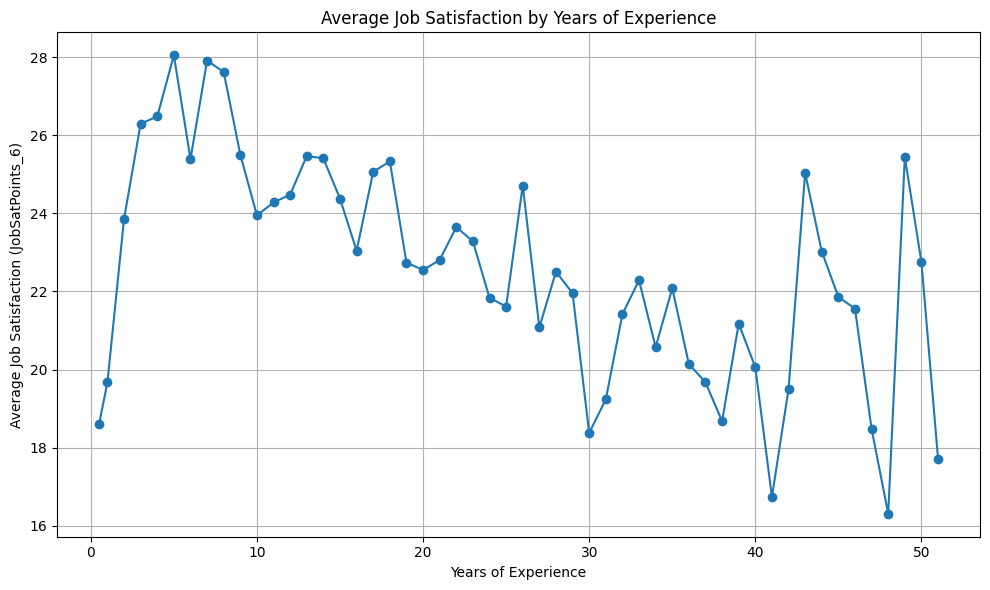

In [19]:
# Step 1: Filter necessary columns and drop missing values
df_filtered = df[['YearsCode', 'JobSatPoints_6']].dropna()

# Step 2: Replace text values
df_filtered['YearsCode'] = df_filtered['YearsCode'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Step 3: Convert to numeric
df_filtered['YearsCode'] = pd.to_numeric(df_filtered['YearsCode'], errors='coerce')

# Step 4: Group by experience and calculate average job satisfaction
satisfaction_by_exp = (
    df_filtered.groupby('YearsCode')['JobSatPoints_6']
    .mean()
    .reset_index()
)

# Step 5: Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_by_exp['YearsCode'], satisfaction_by_exp['JobSatPoints_6'], marker='o')
plt.title('Average Job Satisfaction by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Step 1: Filter and clean the data
df_filtered = df[['YearsCode', 'JobSatPoints_6']].dropna()

# Step 2: Clean textual entries in YearsCode
df_filtered['YearsCode'] = df_filtered['YearsCode'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Step 3: Convert to numeric
df_filtered['YearsCode'] = pd.to_numeric(df_filtered['YearsCode'], errors='coerce')

# Step 4: Group by YearsCode and calculate average job satisfaction
satisfaction_by_exp = (
    df_filtered.groupby('YearsCode')['JobSatPoints_6']
    .mean()
    .reset_index()
)

# Step 5: Create interactive Plotly line chart
fig = px.line(
    satisfaction_by_exp,
    x='YearsCode',
    y='JobSatPoints_6',
    markers=True,
    title='Average Job Satisfaction by Years of Experience',
    labels={
        'YearsCode': 'Years of Experience',
        'JobSatPoints_6': 'Avg Job Satisfaction'
    },
    hover_data={'YearsCode': True, 'JobSatPoints_6': ':.2f'}
)

fig.update_layout(
    xaxis_title='Years of Experience',
    yaxis_title='Average Job Satisfaction',
    template='plotly_white'
)

fig.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
